# Training a neuron to compute AND function

Let us extend the neuron created in the previous section to compute an AND function. It now takes two inputs and tries to compute the following truth table:-

|inp1 | inp2 | out |
|-|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Since there are two inputs, we require two weights to compute the output:-

$$ a = \sigma(w_1x_1+w_2x_2+b)$$

Extending the formula from the previous section:-

$$\frac{\partial C}{\partial w_1} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x_1$$

$$\frac{\partial C}{\partial w_2} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x_2$$

$$\frac{\partial C}{\partial b} = \frac{1}{n}\Sigma(a-e) * a * (1-a)$$

Let us repeat the same process as before:-

## Initialization

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
outp = [0, 0, 0, 1]

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

Again, let us compute the AND function using the initial parameters.

Weight1: -2.162644854299542; Weight2: 0.7799704413433954; Bias: 1.0690079732459412
Input1 = 0; Input2 = 0; Output = 0.7444082139972181; Expected = 0; Error = 0.7444082139972181
Input1 = 0; Input2 = 1; Output = 0.8640071125391666; Expected = 0; Error = 0.8640071125391666
Input1 = 1; Input2 = 0; Output = 0.2509340488192831; Expected = 0; Error = 0.2509340488192831
Input1 = 1; Input2 = 1; Output = 0.4222200557336195; Expected = 1; Error = -0.5777799442663805
Cost = 0.4243623601095241


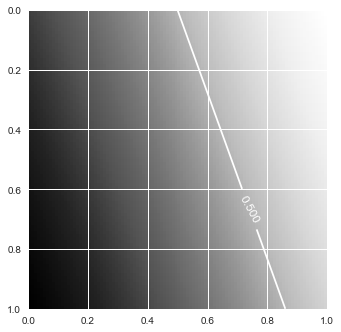

In [4]:
def print_error(w1, w2, b):
    print ("Weight1: {0}; Weight2: {1}; Bias: {2}".format(w1, w2, b))
    
    error = 0
    
    for i in range(4):
        x1,x2 = inp[i]
        e = outp[i]
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        err = a-e
    
        print ("Input1 = {0}; Input2 = {1}; Output = {2}; Expected = {3}; Error = {4}".format(x1, x2, a, e, err))
    
        error += err**2
    
    error /= 4

    print ("Cost = {0}".format(error))
    
    x1 = np.arange(0, 1, 0.01)
    x2 = np.arange(0, 1, 0.01)
    X1, X2 = np.meshgrid(x1, x2)
    Z = sigmoid(w1*X1 + w2*X2 + b)
    im = plt.imshow(Z, cmap=plt.cm.Greys, extent=(0, 1, 1, 0))
    cset = plt.contour(Z, np.array([0.5]), extent=(0,1,0,1))
    plt.clabel(cset)
    plt.show()
    
print_error(w1, w2, b)

Let us perform gradient descent:-

Del_w1 = -0.023445617946301157; Del_w2 = -0.009857440349272894; Del_b = 0.037342973946832725
New weight1 = -2.139199236353241; New weight2 = 0.7898278816926684; New bias = 1.0316649992991085
Weight1: -2.139199236353241; Weight2: 0.7898278816926684; Bias: 1.0316649992991085
Input1 = 0; Input2 = 0; Output = 0.7372385633211014; Expected = 0; Error = 0.7372385633211014
Input1 = 0; Input2 = 1; Output = 0.860745164509923; Expected = 0; Error = 0.860745164509923
Input1 = 1; Input2 = 0; Output = 0.2483308687254422; Expected = 0; Error = 0.2483308687254422
Input1 = 1; Input2 = 1; Output = 0.42123482810078844; Expected = 1; Error = -0.5787651718992115
Cost = 0.4202600705101081


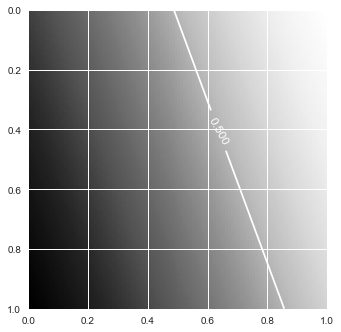

In [8]:
def improve_parameters(w1, w2, b):
    del_w1 = 0
    del_w2 = 0
    del_b = 0
    error = 0
    
    for i in range(4):
        x1,x2 = inp[i]
        e = outp[i]
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        del_w1 += (a-e) * a * (1-a) * x1
        del_w2 += (a-e) * a * (1-a) * x2
        del_b += (a-e) * a * (1-a)
        error += (a-e)**2/2

    del_w1 /= 4
    del_w2 /= 4
    del_b /= 4
    error /= 4
    
    return (del_w1, del_w2, del_b, error)

del_w1, del_w2, del_b, error = improve_parameters(w1, w2, b)
w1 -= del_w1
w2 -= del_w2
b -= del_b
print ("Del_w1 = {0}; Del_w2 = {1}; Del_b = {2}".format(del_w1, del_w2, del_b))
print ("New weight1 = {0}; New weight2 = {1}; New bias = {2}".format(w1, w2, b))

print_error(w1, w2, b)

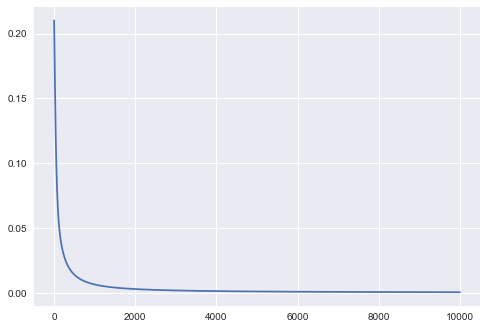

Weight1: 6.517744608347758; Weight2: 6.517744608657851; Bias: -9.865763273571552
Input1 = 0; Input2 = 0; Output = 5.1919547835942445e-05; Expected = 0; Error = 5.1919547835942445e-05
Input1 = 0; Input2 = 1; Output = 0.033960105469357724; Expected = 0; Error = 0.033960105469357724
Input1 = 1; Input2 = 0; Output = 0.03396010545918458; Expected = 0; Error = 0.03396010545918458
Input1 = 1; Input2 = 1; Output = 0.9596789812301387; Expected = 1; Error = -0.04032101876986127
Cost = 0.0009830911941419477


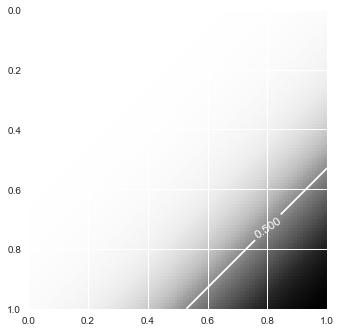

In [9]:
errors = []

for i in range(10000):
    del_w1, del_w2, del_b, error = improve_parameters(w1, w2,b)
    
    w1 -= del_w1
    w2 -= del_w2
    b -= del_b
    
    errors.append(error)
    
plt.plot(errors)
plt.show()

print_error(w1, w2, b)